<a href="https://colab.research.google.com/github/josehumbertodearaujo/Gini-x-Entropy---Comparison/blob/main/Decicion_Tree_Gini_x_Entropy_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparando modelos de árvore de Decisão pelos critérios Gini e Entropia

## Busines Unerstanding

Este projeto tem como objetivo comparar o desempenho de modelos de árvore de decisão utilizando dois critérios de divisão distintos: o critério Gini e o critério de Entropia. A análise será conduzida sobre o mesmo conjunto de dados, permitindo avaliar qual critério apresenta melhores resultados em termos de ajuste e capacidade preditiva.

## Data Unerstanding

A base de dados que será utilizada contém informações sobre carros, divididas em 7 variáveis com 1728 observações não nulas cada, sendo as colunas divididas em atributos e a classe alvo, conforme descrito abaixo:


* buying (preço de compra)

  Representa o custo de aquisição do carro.
  Possíveis valores: 'vhigh' (muito alto), 'high' (alto), 'med' (médio), 'low' (baixo).

*   maint (custo de manutenção)   

  Refere-se ao custo de manutenção do veículo.
  Possíveis valores: 'vhigh' (muito alto), 'high' (alto), 'med' (médio), 'low' (baixo).

*   doors (número de portas)

  Indica o número de portas do veículo.
  Possíveis valores: '2', '3', '4', '5more' (mais de 5).

*   persons (capacidade de passageiros)

  Refere-se à capacidade de passageiros que o carro pode transportar.
  Possíveis valores: '2', '4', 'more' (mais de 4).

*   lug_boot (tamanho do porta-malas)

  Refere-se ao espaço disponível no porta-malas do veículo.
  Possíveis valores: 'small' (pequeno), 'med' (médio), 'big' (grande).

*   safety (nível de segurança)

  Representa a classificação de segurança do veículo.
  Possíveis valores: 'low' (baixo), 'med' (médio), 'high' (alto).

*   class (classe alvo - aceitabilidade do carro)

  Este é o atributo que indica a aceitabilidade do carro. É a variável que queremos prever.
  Possíveis valores: 'unacc' (inaceitável), 'acc' (aceitável), 'good' (bom), 'vgood' (muito bom).

## Objetivos

O principal objetivo deste projeto é comparar o desempenho de modelos de árvore de decisão utilizando dois critérios de divisão distintos: Gini e Entropia. O intuito é prever a aceitabilidade de carros com base em suas características (preço de compra, custo de manutenção, número de portas, entre outras) e avaliar qual critério proporciona melhor acurácia nas classificações. Após o ajuste dos modelos, os resultados serão comparados, destacando as diferenças de desempenho entre os dois critérios.

## Metodologia

## Importação dos dados

In [6]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
# Importando os dados e adicionando os respectivos nomes das features
df = pd.read_csv('car_evaluation.csv', header=None)
df.rename(columns=({0:'buying',
                    1:'maint',
                    2:'doors',
                    3:'persons',
                    4:'lug_boot',
                    5:'safety',
                    6:'class'}),inplace=True)

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Preprocessamento

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
# Verificando contagem / quantidade de valores unicos
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [12]:
# Verificando se há valores nulos
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [13]:
# Separar as features e a target
X = df.drop(columns=('class'))
y = df['class']

In [14]:
# Realizando o encoding das variáveis catégoricas para entrar no modelo

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(dtype=int).fit(X)

X = pd.DataFrame(encoder.transform(X), columns = X.columns, index = X.index )
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [15]:
#Dividido entre conjunto de teste e treino
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
X_train.shape, X_test.shape


((1157, 6), (571, 6))

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


## Árvore de Decisão - Criério Gini

In [18]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

Encontrando a melhor profundidade do parâmetro max_depth da árvore de decisão. O método utilizado foi o GridSearchCV do Sklearn.

Sua documenação pode ser consultada [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [19]:
arvore = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0)
param_grid = {'max_depth': range(1,15)}

grid_search = GridSearchCV(arvore, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']

print('Melhor max_depth: ', best_max_depth)

Melhor max_depth:  12


Ajustando a árvore de decisão pelo critério Gini utilizando o max_depth encontrado anteriormente

In [20]:
arvore_gini = tree.DecisionTreeClassifier(criterion = 'gini',
                                          max_depth = best_max_depth,
                                          random_state = 0)

arvore_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=0)

In [21]:
# Verificando a acurácia do ajuste pelo critério gini nos dados de treino

y_pred_train_gini = arvore_gini.predict(X_train)

as_train_gini = accuracy_score(y_train, y_pred_train_gini)

print(f'Accuracy Score train (Gini): {as_train_gini:.4f}')


Accuracy Score train (Gini): 0.9991


In [22]:
# Verificando a acurácia do ajuste pelo critério gini nos dados de teste
# Verificando a presença de overfitting ou underfitting

y_pred_test_gini = arvore_gini.predict(X_test)

as_test_gini = accuracy_score(y_test, y_pred_test_gini)

print(f'Accuracy Score teste (Gini): {as_test_gini:.4f}')


Accuracy Score teste (Gini): 0.9615


In [23]:
#  permite verificar a quais grupos as folhas pertencem a partir da contagem inicial do nó raiz.
# Neste caso, value = [acc, good, unacc, vgood]
y_train.value_counts()

,count
class,
unacc,813
acc,255
good,49
vgood,40


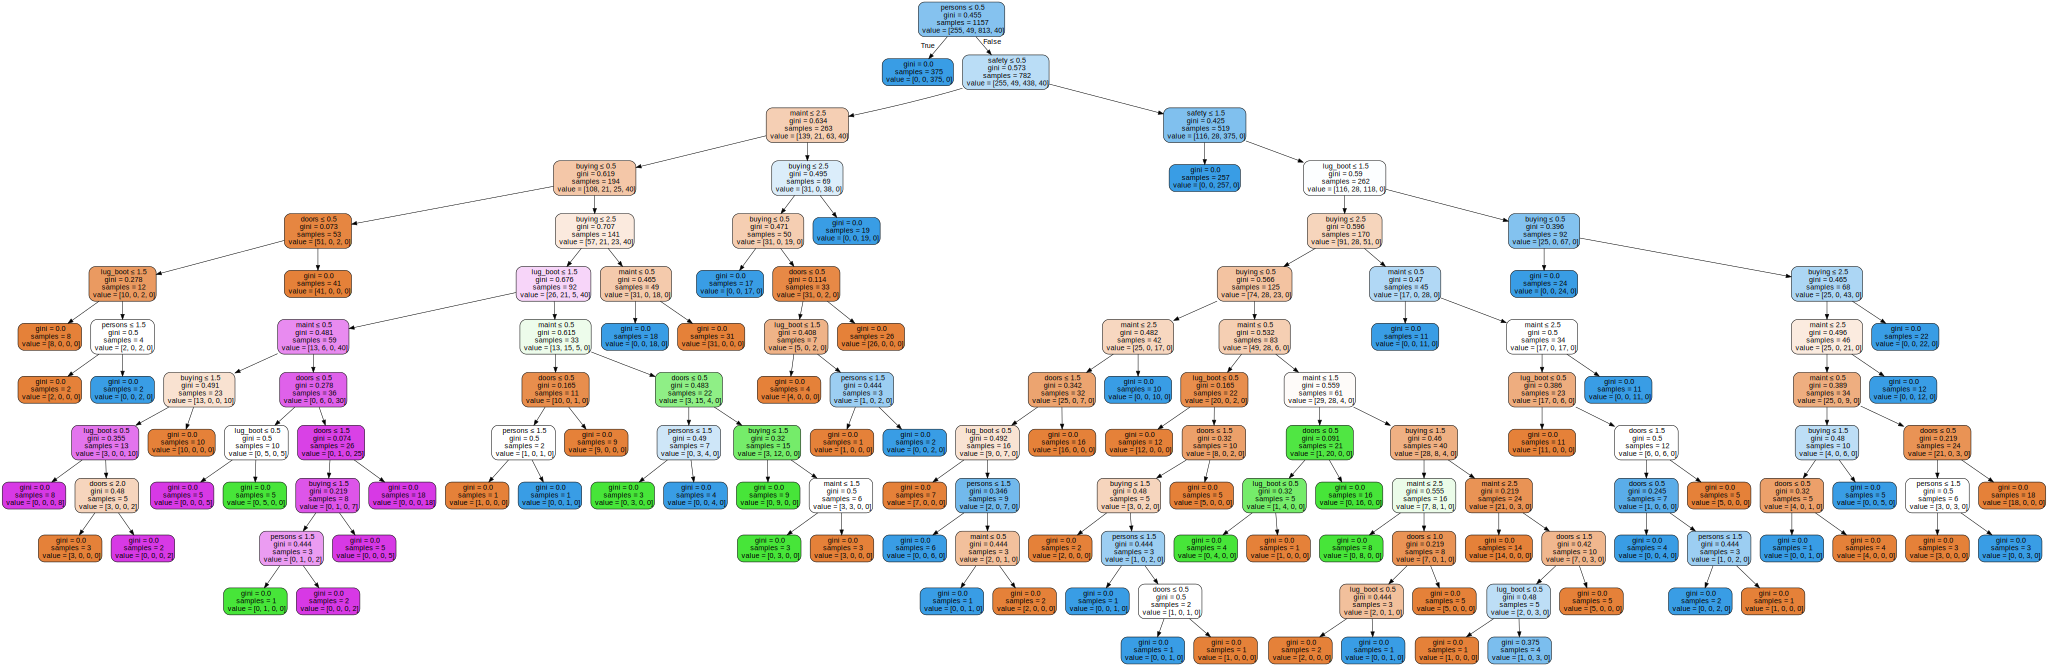

In [24]:
# plotando a árvore através do graphviz (mais eficiente que o plot_tree())
import graphviz

export_gini = tree.export_graphviz(arvore_gini, out_file = None,
                               feature_names = X.columns,
                               filled = True, rounded = True,
                               special_characters = True)

grafico_gini = graphviz.Source(export_gini)

grafico_gini

In [25]:
# Verificando a importancia de cada feature para a árvore
importancia_gini = pd.DataFrame(data = {'Features':arvore_gini.feature_names_in_,
                                   'Importancia':arvore_gini.feature_importances_})
importancia_gini.sort_values('Importancia', ascending = False)

,Features,Importancia
5,safety,0.242523
1,maint,0.223528
0,buying,0.206888
3,persons,0.177663
4,lug_boot,0.099465
2,doors,0.049933


In [26]:
# Matriz de confusão para o critério Gini
CM_gini = confusion_matrix(y_test, y_pred_test_gini)
print(CM_gini)

[[117   8   3   1]
 [  0  19   0   1]
 [  4   0 393   0]
 [  3   2   0  20]]


In [27]:
# Classificantion Report
print(classification_report(y_test, y_pred_test_gini, zero_division=False));

              precision    recall  f1-score   support

         acc       0.94      0.91      0.92       129
        good       0.66      0.95      0.78        20
       unacc       0.99      0.99      0.99       397
       vgood       0.91      0.80      0.85        25

    accuracy                           0.96       571
   macro avg       0.88      0.91      0.89       571
weighted avg       0.97      0.96      0.96       571



## Árvore de Decisão - Critério da Entropia

In [28]:
arvore = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
param_grid = {'max_depth': range(1,15)}

grid_search = GridSearchCV(arvore, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']

print('Melhor max_depth: ', best_max_depth)

Melhor max_depth:  11


In [29]:
arvore_entropia = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=best_max_depth, random_state=0)
arvore_entropia.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=0)

In [30]:
# Verificando a acurácia do ajuste pelo critério da entropia nos dados de treino

y_pred_train_entropia = arvore_entropia.predict(X_train)

as_train_entropia = accuracy_score(y_train, y_pred_train_entropia)

print(f'Accuracy Score train (Entropia): {as_train_entropia:.4f}')

Accuracy Score train (Entropia): 0.9965


In [31]:
# Verificando a acurácia do ajuste pelo critério da entropia nos dados de teste

y_pred_test_entropia = arvore_entropia.predict(X_test)

as_test_entropia = accuracy_score(y_test, y_pred_test_entropia)

print(f'Accuracy Score teste (Entropia): {as_test_entropia:.4f}')

Accuracy Score teste (Entropia): 0.9650


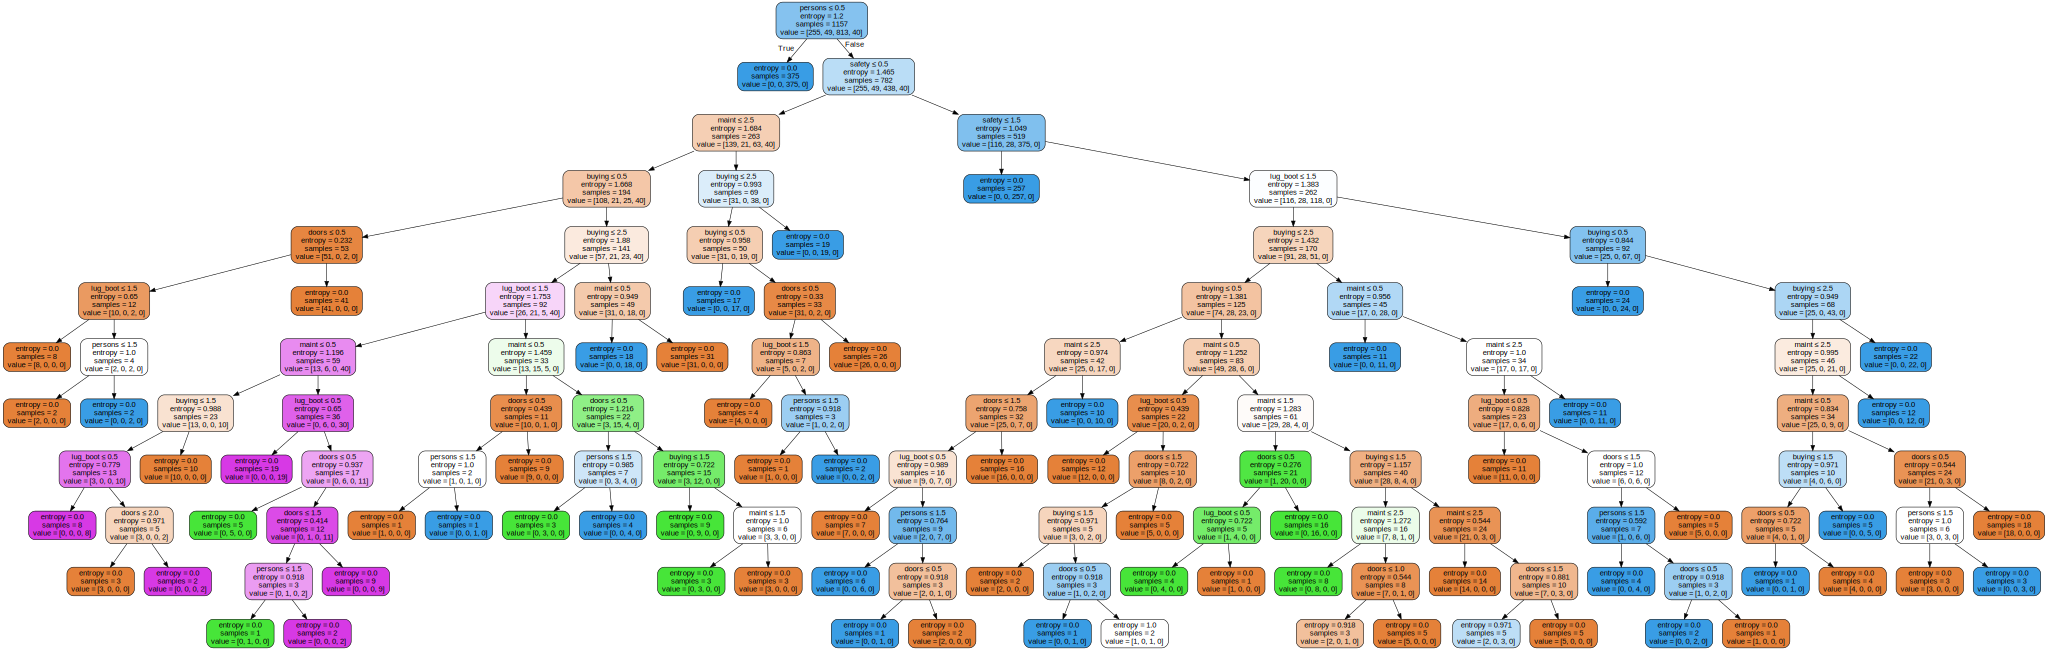

In [32]:
# plotando a árvore através do graphviz (mais eficiente que o plot_tree())

export_entropia = tree.export_graphviz(arvore_entropia, out_file = None,
                               feature_names = X.columns,
                               filled = True, rounded = True,
                               special_characters = True)

grafico_entropia = graphviz.Source(export_entropia)

grafico_entropia

In [33]:
# Verificando a importancia de cada feature para a árvore
importancia_entropia = pd.DataFrame(data = {'Features':arvore_entropia.feature_names_in_,
                                   'Importancia':arvore_entropia.feature_importances_})
importancia_entropia.sort_values('Importancia', ascending = False)

,Features,Importancia
5,safety,0.246981
0,buying,0.208440
3,persons,0.197288
1,maint,0.196193
4,lug_boot,0.091222
2,doors,0.059877


In [34]:
# Calculando a matriz de confusão
CM_entropia = confusion_matrix(y_test, y_pred_test_entropia)
print(CM_entropia)

[[116   9   4   0]
 [  0  20   0   0]
 [  4   0 393   0]
 [  3   0   0  22]]


In [35]:
y_test.value_counts()

,count
class,
unacc,397
acc,129
vgood,25
good,20


In [36]:
# Classificantion Report
print(classification_report(y_test, y_pred_test_entropia, zero_division=False));

              precision    recall  f1-score   support

         acc       0.94      0.90      0.92       129
        good       0.69      1.00      0.82        20
       unacc       0.99      0.99      0.99       397
       vgood       1.00      0.88      0.94        25

    accuracy                           0.96       571
   macro avg       0.91      0.94      0.92       571
weighted avg       0.97      0.96      0.97       571



# Conclusões

Comparação Entre Gini e Entropia:


*   Classe 'acc' (aceitável):

      Critério Gini classificou corretamente 117 instâncias, enquanto Entropia classificou 116. Entropia teve mais erros de classificação para 'good' e 'unacc'.

*   Classe 'good' (bom):

      Critério Gini cometeu 1 erro classificando uma instância de 'good' como 'vgood'.
      Critério Entropia classificou todas as instâncias corretamente, sem erros.
      

*    Classe 'unacc' (inaceitável):  
      
      Ambas as árvores cometeram os mesmos erros, classificando 4 instâncias de 'unacc' como 'acc'.


*   Classe 'vgood' (muito bom):

      Critério Gini cometeu 5 erros no total (3 como 'acc' e 2 como 'good').
      Critério Entropia foi mais preciso, com apenas 3 erros (todos como 'acc').


De forma geral, o Critério Gini parece ser mais eficaz na classificação da classe 'acc' (aceitável), com uma taxa de acerto ligeiramente melhor.
O Critério Entropia apresentou melhor desempenho na classe 'good' (sem erros) e na classe 'vgood', com uma menor quantidade de erros gerais.

Ambos os critérios tiveram um desempenho muito semelhante na classe 'unacc', mas o critério Entropia foi superior em termos de precisão geral nas classes 'good' e 'vgood'. Além disso, o max_depth ótimo, que fora calculado para ambos os critérios é menor para o critério da entropia, sugerindo que, de alguma forma o modelo que utiliza a entropia fosse mais simples que o Gini.





Em relação a importância das features em cada modelo, observa-se que a feature Safety (segurança) é a variável mais importante em ambos os modelos, indicando que a classificação de aceitabilidade do carro é fortemente influenciada por seu nível de segurança. Em ambos os modelos, se a feature Safety for classificada como 'low', esse fator se torna determinante para classificar sua aceitabilidade como 'unacc'.

No critério Gini, o custo de manutenção (maint) é mais importante que o preço de compra (buying), enquanto no critério Entropia, o preço de compra assume maior relevância. Isso pode sugerir que o modelo de entropia dá mais ênfase ao preço inicial do veículo, enquanto Gini prioriza o custo de manutenção.
A capacidade de passageiros (persons) tem importância semelhante em ambos os critérios, mostrando que é uma feature relevante para a classificação, embora abaixo dos fatores de custo e segurança.

Tanto o tamanho do porta-malas (lug_boot) quanto o número de portas (doors) são as variáveis menos relevantes nos dois modelos, com uma importância ligeiramente maior no critério Gini.
